In [1]:
import time
import scipy.io as scio
import torch
from sklearn import manifold
from tsnecuda import TSNE
import numpy as np
import matplotlib.pyplot as plt


Mon Oct 12 16:03:29 2020
fr_cs torch.Size([95087, 192])
label_cs torch.Size([95087])
fr_cs_tsne (95087, 2)
Mon Oct 12 16:55:33 2020


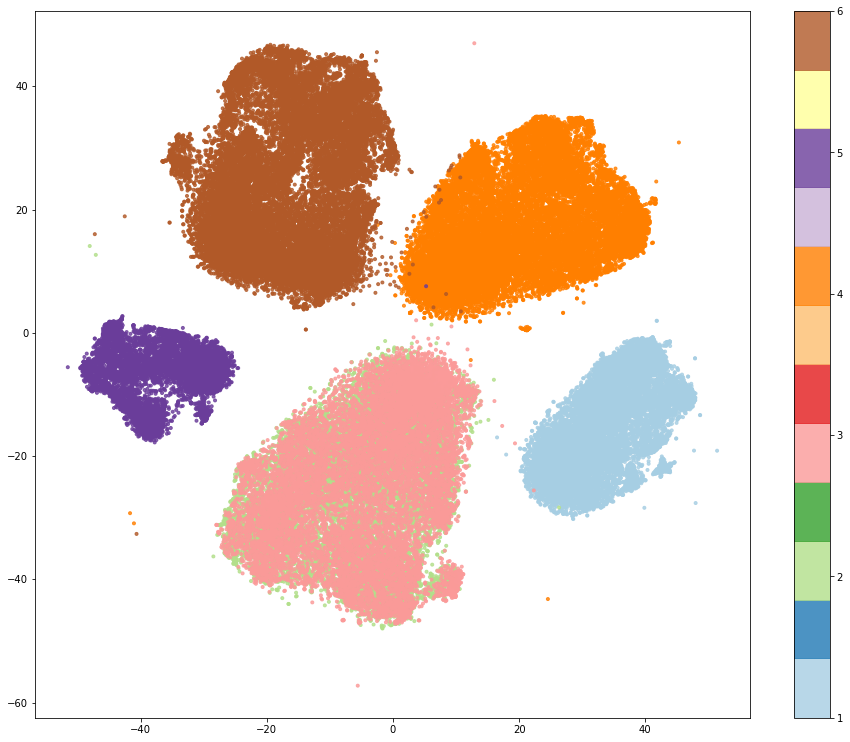

In [2]:
print(time.asctime(time.localtime(time.time())))
##Data
fr_cs=[]
label_cs=[]
for Session in range(1,7):#Session1~6
    ##Firing rate(input)
    data = scio.loadmat("./data/s"+str(Session)+".mat")
    FR=torch.zeros([192,data['bin_firing_rate'].shape[1],data['bin_firing_rate'][0][0].shape[1]])
    for i in range(FR.size(0)):
        for j in range(FR.size(1)):
            FR[i][j]=torch.from_numpy(data['bin_firing_rate'][i][j]).float()
    #FR torch.Size([192, 3, 12777])
    ##sorted
#     FR=FR.reshape(-1,data['bin_firing_rate'][0][0].shape[1])
    ##unsort
    FR=sum(FR.transpose(0,1))
    
    fr_cs+=FR.transpose(0,1)
    ##label
    label=torch.full([FR.size(1)],Session)
    label_cs+=label
    ##movement(label)
#     finger = torch.from_numpy(data['finger'])[1:].transpose(1,0).float()
#     finger = (finger[1:3].transpose(0,1)*(-10))
#     vel_f=torch.from_numpy(data['vel_f']).float()
#     vel_f=(vel_f[1:3].transpose(0,1)*(-10)/0.064)
#     acc_f = torch.from_numpy(data['acc_f']).float()
#     acc_f = (acc_f[1:3].transpose(0,1)*-10/0.004096)
#     acc_f = torch.cat((torch.zeros(1,2),acc_f),0)#補零=vel_f.size()

fr_cs=torch.stack(fr_cs)
label_cs=torch.stack(label_cs)
print('fr_cs',fr_cs.size())
print('label_cs',label_cs.size())
##t-SNE
tsne = manifold.TSNE(n_components=2,perplexity=30,learning_rate=500)
fr_cs_tsne = tsne.fit_transform(fr_cs)
##t-SNE CUDA
# fr_cs_tsne = TSNE(n_components=2, perplexity=20, learning_rate=500).fit_transform(fr_cs)#perplexity困惑:5~50

print('fr_cs_tsne',fr_cs_tsne.shape)
##fig
plt.figure(figsize=(16,13))
plt.scatter(fr_cs_tsne[:,0],fr_cs_tsne[:,1],c=label_cs,
            cmap='Paired',
            marker='.',
            alpha=0.8,#透明度
            label="train")
plt.colorbar()
print(time.asctime(time.localtime(time.time())))